## <span style="color:green">**Version en cours**</span>

# Segmentez des clients d'un site e-commerce
## Notebook 3 : Tests de modèles de clustering
OpenClassrooms - Parcours Data Scientist - Projet 05  

## Présentation du projet

**Contexte**  


* Olist est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.  
* Dans un premier temps il est demandé de réaliser quelques requêtes pour le dashboard à partir de la base de données SQLite d'Olist.  
* La mission principale est de fournir aux équipes d'e-commerce d'Olist une **segmentation des clients** qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

**Démarche globale**  
* Requêtes SQL pour le dashboard (cf Notebook 1)  
* Feature ingineering (cf Notebook 2)
* **Tests de modèles de clustering** : c'est l'objet de ce notebook  
* Simulation d'un contrat de maintenace (Notebbok 4)  

**Tests de modèles de clustering**  
* Objectif :
   * bla bla bla 

## Sommaire  
**Préparation de l'environnement**  
* Environnement virtuel
* Import des modules
* Fonctions
* Chargement du dataset


# 1 Préparation de l'environnement

## 1.1 Environnement virtuel

In [1]:
# Vérification environnement virtuel
envs = !conda env list
print(f"Environnement virtuel : {[e for e in envs if '*' in e][0].split('*')[1].strip()}")

Environnement virtuel : C:\Users\chrab\anaconda3\envs\opc5


## 1.2 Import des modules

* Installation conditionnelle des librairies

In [2]:
import sys
import subprocess
import pkg_resources

def install_package(package):
    """Installe une librairie en mode silencieux si elle n'est pas encore installée"""
    try:
        pkg_resources.get_distribution(package)
    except pkg_resources.DistributionNotFound:
        print(f"Installation {package}... ", end='')
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
        print(f"Terminé.")
    else:
        print(f"{package} est déjà installé.")

In [3]:
# Installation des librairies
install_package('pandas')
install_package('numpy')
install_package('matplotlib')
install_package('seaborn')
install_package('scikit-learn')

pandas est déjà installé.
numpy est déjà installé.
matplotlib est déjà installé.
seaborn est déjà installé.
scikit-learn est déjà installé.


* Import des modules

In [4]:
# Import des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## 1.3 Fonctions

## 1.4 Chargement des données

In [5]:
# Chargement 'df_features'
df_features = pd.read_csv('df_features.csv')

In [6]:
# Affichage des premières et dernières lignes
df_features

,Id client,Récence_orig,Fréquence_orig,Montant_orig,Récence,Fréquence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,113,0,141.90,0.184692,0,0.009690
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,0,27.19,0.189684,0,0.001289
2,0000f46a3911fa3c0805444483337064,539,0,86.22,0.893511,0,0.005612
3,0000f6ccb0745a6a4b88665a16c9f078,323,0,43.62,0.534110,0,0.002492
4,0004aac84e0df4da2b147fca70cf8255,290,0,196.89,0.479201,0,0.013717
...,...,...,...,...,...,...,...
95116,fffcf5a5ff07b0908bd4e2dbc735a684,449,0,2067.42,0.743760,0,0.150707
95117,fffea47cd6d3cc0a88bd621562a9d061,264,0,84.58,0.435940,0,0.005492
95118,ffff371b4d645b6ecea244b27531430a,570,0,112.46,0.945092,0,0.007534
95119,ffff5962728ec6157033ef9805bacc48,121,0,133.69,0.198003,0,0.009089


# 2 Test de clustering via scikit-learn KMeans

## 2.1 Premier test avec 5 clusters

In [7]:
# Nombre de clusters
k = 5

In [8]:
# Initialisation du modèle
kmeans = KMeans(n_clusters=k, random_state=0)

In [9]:
# Sélection des features
features = df_features[['Récence', 'Fréquence', 'Montant']]

In [10]:
# Entraînement du modèle
kmeans.fit(features)

KMeans(n_clusters=5, random_state=0)

In [11]:
# Attribution des labels de cluster au DataFrame
df_features['Cluster'] = kmeans.labels_

In [12]:
# Affichage du résultat
display(df_features)

,Id client,Récence_orig,Fréquence_orig,Montant_orig,Récence,Fréquence,Montant,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,113,0,141.90,0.184692,0,0.009690,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,0,27.19,0.189684,0,0.001289,2
2,0000f46a3911fa3c0805444483337064,539,0,86.22,0.893511,0,0.005612,4
3,0000f6ccb0745a6a4b88665a16c9f078,323,0,43.62,0.534110,0,0.002492,3
4,0004aac84e0df4da2b147fca70cf8255,290,0,196.89,0.479201,0,0.013717,3
...,...,...,...,...,...,...,...,...
95116,fffcf5a5ff07b0908bd4e2dbc735a684,449,0,2067.42,0.743760,0,0.150707,4
95117,fffea47cd6d3cc0a88bd621562a9d061,264,0,84.58,0.435940,0,0.005492,0
95118,ffff371b4d645b6ecea244b27531430a,570,0,112.46,0.945092,0,0.007534,4
95119,ffff5962728ec6157033ef9805bacc48,121,0,133.69,0.198003,0,0.009089,2


,Cluster,Id client,%
0,0,30627,32.20
1,1,2900,3.05
2,2,29719,31.24
3,3,18451,19.40
4,4,13424,14.11


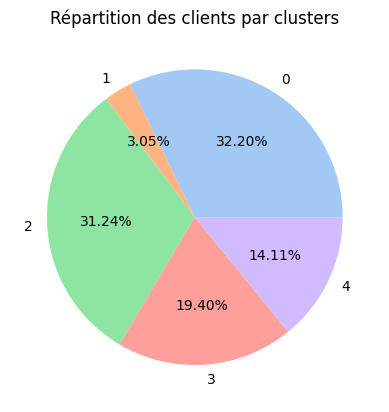

In [13]:
# Nombre de clients par clusters
df_number_of_customers_by_clusters = df_features.groupby('Cluster')['Id client'].count().reset_index()

# Ajout pourcentages
number_of_customers = df_features.shape[0]
df_number_of_customers_by_clusters['%'] = round((df_number_of_customers_by_clusters['Id client'] / number_of_customers) * 100, 2)
display(df_number_of_customers_by_clusters)

# Graphique de répartition
colors = sns.color_palette('pastel')[0:5]
plt.title('Répartition des clients par clusters')
plt.pie(df_number_of_customers_by_clusters['Id client'], labels=df_number_of_customers_by_clusters['Cluster'], colors = colors, autopct='%.2f%%')
plt.show()

* Le modèle segmente bien les clients en **5 clusters** 
* Chaque segment représente **entre 3 et 32 % des clients**